<a href="https://colab.research.google.com/github/alwinbahari/kuliah/blob/main/Lat_K_MEANS_pada_dataset_IMFData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: ALWIN BAHARI <br>
NIM : 2111600512

# Practice
Lakukan analisis clustering menggunakan metode K-Means menggunakan dataset IMFData.csv yang dapat diunduh dari https://github.com/achmatim/data-mining/blob/main/Dataset/IMFdata.csv

# Load library:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
%matplotlib inline

# Data Preparation
### Dataset

In [2]:
!wget -O imfdata.csv https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/IMFdata.csv

--2023-01-11 01:25:28--  https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/IMFdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8647 (8.4K) [text/plain]
Saving to: ‘imfdata.csv’

imfdata.csv         100%[===================>]   8.44K  --.-KB/s    in 0s      

2023-01-11 01:25:28 (62.7 MB/s) - ‘imfdata.csv’ saved [8647/8647]



### Load Dataset

In [3]:
df2 = pd.read_csv('imfdata.csv',encoding='latin1')
df2

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment,Country
0,3.877,21.977,0.037,30.398,26.521,Afghanistan
1,-11.372,25.835,0.032,14.509,25.886,Albania
2,7.489,36.458,0.337,48.947,41.428,Algeria
3,9.024,43.479,0.147,21.692,12.668,Angola
4,-13.109,22.430,0.002,16.194,29.303,Antigua and Barbuda
...,...,...,...,...,...,...
181,4.878,31.123,0.471,26.850,21.972,Venezuela
182,-4.139,29.594,0.371,34.904,39.043,Vietnam
183,-4.449,26.031,0.085,7.192,11.641,Yemen
184,7.068,19.569,0.027,29.635,22.567,Zambia


### Preprocessing


In [4]:
df2_clust = df2[['Current account balance','General government revenue','Gross domestic product based on purchasing-power-parity (PPP) share of world total','Gross national savings','Total investment']]
df2_clust

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment
0,3.877,21.977,0.037,30.398,26.521
1,-11.372,25.835,0.032,14.509,25.886
2,7.489,36.458,0.337,48.947,41.428
3,9.024,43.479,0.147,21.692,12.668
4,-13.109,22.430,0.002,16.194,29.303
...,...,...,...,...,...
181,4.878,31.123,0.471,26.850,21.972
182,-4.139,29.594,0.371,34.904,39.043
183,-4.449,26.031,0.085,7.192,11.641
184,7.068,19.569,0.027,29.635,22.567


In [5]:
df2.isna().sum()

Current account balance                                                                1
General government revenue                                                             0
Gross domestic product based on purchasing-power-parity (PPP) share of world total     0
Gross national savings                                                                15
Total investment                                                                      12
Country                                                                                0
dtype: int64

### Data Normalization
Metode K-Means didasarkan pada tingkat kedekatan antar-fitur. Oleh karena itu, normalisasi data perlu dilakukan.

In [30]:
from sklearn.preprocessing import StandardScaler
X = df2_clust.values[:,1:]
X = np.nan_to_num(X)
scaler = StandardScaler().fit_transform(X)
scaler
X

array([[ 2.1977e+01,  3.7000e-02,  3.0398e+01,  2.6521e+01],
       [ 2.5835e+01,  3.2000e-02,  1.4509e+01,  2.5886e+01],
       [ 3.6458e+01,  3.3700e-01,  4.8947e+01,  4.1428e+01],
       [ 4.3479e+01,  1.4700e-01,  2.1692e+01,  1.2668e+01],
       [ 2.2430e+01,  2.0000e-03,  1.6194e+01,  2.9303e+01],
       [ 3.7199e+01,  8.6300e-01,  2.2595e+01,  2.4451e+01],
       [ 2.0970e+01,  2.3000e-02,  1.6660e+01,  3.1313e+01],
       [ 3.1846e+01,  1.1750e+00,  2.3925e+01,  2.6794e+01],
       [ 4.8105e+01,  4.4700e-01,  2.4611e+01,  2.1602e+01],
       [ 4.5652e+01,  1.2200e-01,  4.6955e+01,  1.8532e+01],
       [ 2.7174e+01,  4.0000e-02,  3.4544e+01,  3.0965e+01],
       [ 1.1514e+01,  3.4900e-01,  2.9356e+01,  2.4808e+01],
       [ 3.5403e+01,  9.0000e-03,  5.9190e+00,  1.4161e+01],
       [ 4.1593e+01,  1.7600e-01,  2.7355e+01,  4.2345e+01],
       [ 4.8639e+01,  5.3300e-01,  2.1971e+01,  2.0566e+01],
       [ 2.7536e+01,  4.0000e-03,  1.5142e+01,  1.8000e+01],
       [ 2.0047e+01,  1.

# Modelling 

### Modelling dengan K-Means
Pada praktikum ini, kita akan menerapkan metode K-Means Clustering dengan jumlah klaster sebanyak **3 klaster** dan inisialisasi centroid dengan metode **k-means++** yang diusulkan oleh David Arthur dan Sergei Vassilvitskii tahun 2007 (Ref: https://en.wikipedia.org/wiki/K-means%2B%2B). 

In [31]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 0 1 0 1 1 0 0 1 1 2 1 0 2 2 1 0 0 1 0 0 1 2 2 2 2 0 1 2 1 1 1 2 2 2
 2 0 0 0 2 0 0 2 2 2 1 2 2 1 2 0 1 2 0 0 2 1 2 0 2 2 2 2 2 2 2 1 2 1 0 2 1
 1 0 2 1 0 0 2 1 2 1 2 0 1 2 0 2 2 0 1 0 2 0 0 0 1 1 1 2 2 0 2 2 1 0 1 2 1
 2 2 1 1 0 2 2 1 1 0 1 2 2 2 2 1 1 0 0 1 0 1 0 2 2 2 1 0 1 0 1 2 1 1 0 0 2
 2 0 1 1 1 2 2 2 2 0 2 1 1 2 1 1 2 2 2 2 1 1 2 2 0 2 0 1 2 2 2 1 2 1 1 2 1
 2]


### Cluster Labelling
Labelisasi diperlukan untuk mempermudah analisis data

In [32]:
df2["Cluster"] = labels
df2

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment,Country,Cluster
0,3.877,21.977,0.037,30.398,26.521,Afghanistan,1
1,-11.372,25.835,0.032,14.509,25.886,Albania,2
2,7.489,36.458,0.337,48.947,41.428,Algeria,1
3,9.024,43.479,0.147,21.692,12.668,Angola,0
4,-13.109,22.430,0.002,16.194,29.303,Antigua and Barbuda,1
...,...,...,...,...,...,...,...
181,4.878,31.123,0.471,26.850,21.972,Venezuela,1
182,-4.139,29.594,0.371,34.904,39.043,Vietnam,1
183,-4.449,26.031,0.085,7.192,11.641,Yemen,2
184,7.068,19.569,0.027,29.635,22.567,Zambia,1


Sekarang kita **hitung rata-rata** tiap klaster.

In [33]:
df2.groupby('Cluster').mean()

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment
Cluster,,,,,
0,2.984304,47.195391,0.604500,22.401976,20.633524
1,-1.916581,26.451887,0.688645,28.828371,30.607097
2,-8.301740,25.143064,0.378192,10.389597,18.686257


In [34]:
df2.groupby('Cluster').count()

,Current account balance,General government revenue,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Gross national savings,Total investment,Country
Cluster,,,,,,
0,46,46,46,42,42,46
1,62,62,62,62,62,62
2,77,78,78,67,70,78


# Data Visualization
Mari kita visualisasikan beberapa data dan hasil klasterisasi.

Distribusi data atribut **Gross national savings** dan **Total investment**.

<ipython-input-35-9b19cd5b8c52>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


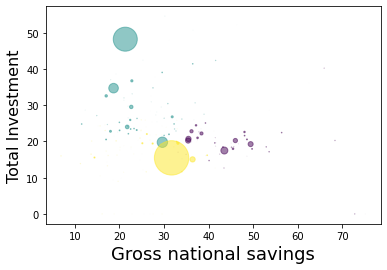

In [35]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Gross national savings', fontsize=18)
plt.ylabel('Total Investment', fontsize=16)

plt.show()

Distribusi data juga dapat ditampilkan dalam bentuk **Plot3D**

<ipython-input-37-ebc2398df8b5>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


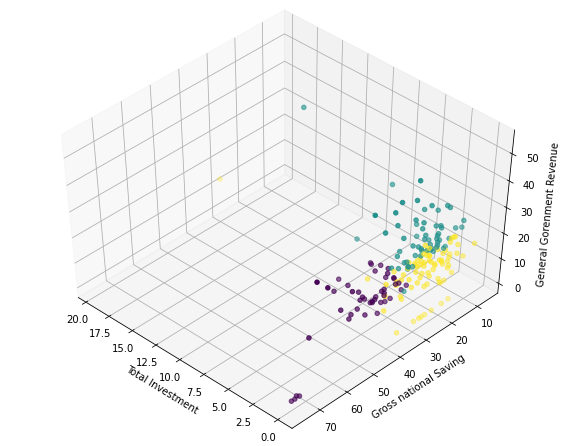

In [37]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Total Investment')
ax.set_ylabel('Gross national Saving')
ax.set_zlabel('General Gorenment Revenue')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

# Find the Optimal Number of Clusters with Elbow Method

Lakukan perhitungan nilai **Sum Squared Error (SSE)** dengan rentang nilai k dari 1 hingga 10.

In [38]:
sse = [] # sum squared error
for k in range(1, 11):
  kmeans = KMeans(init = "k-means++", n_clusters = k)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

Tampilkan hasilnya dalam bentuk grafik / plot

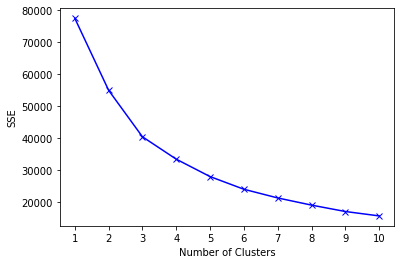

In [39]:
plt.plot(range(1, 11), sse, 'bx-')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Secara visual, dari grafik di atas kita dapat menyimpulkan bahwa jumlah klaster terbaik berdasarkan metode **Elbow** adalah **3** atau **4** karena pada titik tersebut grafik SSE mulai mendatar.

**Apakah penentuan jumlah klaster dapat dilakukan secara otomatis?**. 

Jawabnya, bisa. Kita akan mencoba memanfaatkan package kneed.

Pertama, kita perlu menginstall package **kneed**:

In [28]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print('Jumlah klaster paling optimal = ',kl.elbow)

Jumlah klaster paling optimal =  4
